In [83]:
import pandas as pd
import yfinance as yf
import numpy as np
import numpy as np
import scipy.optimize as sco
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import math

%config InlineBackend.figure_format = 'svg'

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [84]:
# Application aux tickers qu'Hugo a proposé (il y en a 146 d'après ce que j'ai vu en faisant tourner)
START_DATE = '2013-01-01' 
END_DATE = '2023-12-30'
tickers = ["MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOGL", "GOOG", "LLY", "JPM","AVGO", "UNH", "TSLA", "V", "XOM", "MA", "JNJ", "PG", "HD", "COST", "ABBV", "AMD", "MRK", "CRM", "CVX", "NFLX", "WMT", "BAC", "ACN", "KO", "LIN", "PEP", "TMO", "ADBE", "WFC", "DIS", "MCD", "ABT", "ORCL", "CSCO", "QCOM", "GE", "INTC", "CAT", "INTU", "IBM", "CMCSA", "VZ", "AMAT", "DHR", "PFE", "TXN", "UBER", "NOW", "UNP", "PM", "AMGN", "COP", "LOW", "ISRG", "SPGI", "HON", "GS", "AXP", "RTX", "NEE", "T", "NKE", "ELV", "PGR", "LRCX", "PLD", "BKNG", "SYK", "ETN", "BLK", "TJX", "MDT", "UPS", "MS", "C", "BMY", "VRTX", "BA", "CB", "CI", "MU", "SBUX", "REGN", "MMC", "DE", "SCHW", "ADP", "CVS", "ADI", "BSX", "MDLZ", "LMT", "KLAC", "AMT", "GILD", "BX", "FI", "PANW", "TMUS", "SNPS", "CDNS", "EQIX", "ZTS", "SHW", "CME", "MO", "WM", "ICE", "TGT", "CMG", "SO", "SLB", "ITW", "CSX", "DUK", "CL", "EOG", "MPC", "MCK", "ANET", "PH", "BDX", "PSX", "PYPL", "TT", "ORLY", "USB", "NOC", "APH", "TDG", "FCX", "AON", "HCA", "EMR", "GD", "PCAR", "NXPI", "MCO", "MAR", "PNC", "FDX"]
data = yf.download(tickers, start=START_DATE, end=END_DATE)

[*********************100%%**********************]  146 of 146 completed


In [85]:
# Compute returns
returns_df = data['Adj Close'].pct_change(fill_method=None).ffill()
returns_df.index = pd.to_datetime(returns_df.index)
returns_df.fillna(0, inplace=True)

mu = pd.DataFrame(index=pd.date_range(start='2015-01-01', end=END_DATE, freq='ME'), columns=tickers)

for month_end in mu.index:
    # Définir la période de 24 mois précédant la fin du mois
    start_period = month_end - pd.DateOffset(months=24)
    window_returns = returns_df.loc[start_period:month_end]
    
    # Calculer la moyenne des rendements mensuels sur la fenêtre
    mu.loc[month_end] = window_returns.mean()

In [86]:
filtered_returns = returns_df.loc['2015-01-01':'2023-11-30'].resample('ME').mean()

In [87]:
monthly_returns_df = returns_df.resample('ME').mean()
monthly_returns_df

Ticker,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,AMAT,AMD,AMGN,...,UPS,USB,V,VRTX,VZ,WFC,WM,WMT,XOM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,-0.008323,0.002783,0.002901,0.001933,-0.000607,-0.000349,0.000746,0.004201,0.002030,-0.001948,...,0.001873,0.000217,0.000808,0.001389,-0.000108,0.000060,0.003295,0.000501,0.000692,0.000000
2013-02-28,-0.001209,0.000445,-0.000110,0.001840,0.002090,0.002374,0.001872,0.003658,-0.001949,0.003990,...,0.002607,0.001419,0.000432,0.002554,0.003434,0.000423,0.001371,0.000666,0.000115,0.004131
2013-03-31,0.000284,0.005067,0.002290,0.001138,0.005185,0.001457,0.003283,-0.000769,0.001405,0.005737,...,0.001958,0.000235,0.003475,0.008204,0.002774,0.002708,0.002990,0.003136,0.000329,0.000062
2013-04-30,0.000229,0.006134,0.002257,0.003758,0.001642,-0.002394,0.001634,0.003498,0.005270,0.001093,...,0.000011,-0.000834,-0.000294,0.021631,0.004753,0.001242,0.002067,0.001763,-0.000528,-0.000233
2013-05-31,0.001102,-0.003249,-0.000198,0.000406,-0.002136,0.002350,0.000984,0.002494,0.017227,-0.001304,...,0.000376,0.002399,0.002762,0.002289,-0.004753,0.003388,0.001066,-0.001411,0.001103,-0.001307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.001754,-0.000745,-0.003369,0.001057,0.001191,-0.003943,0.001298,0.000680,-0.002942,0.004429,...,-0.003884,-0.003495,0.001539,-0.000417,0.001185,-0.004452,-0.001875,0.000928,0.002003,0.000684
2023-09-30,-0.004534,0.000764,-0.002971,-0.002512,-0.004465,-0.001571,-0.002540,-0.004786,-0.001130,0.002444,...,-0.004084,-0.004083,-0.003241,-0.000045,-0.003779,-0.000434,-0.001152,-0.000808,0.002898,-0.004461
2023-10-31,-0.000066,-0.001932,-0.000705,-0.001265,0.002113,-0.004764,-0.004191,-0.001904,-0.001656,-0.002126,...,-0.004311,-0.001310,0.001051,0.001911,0.004941,-0.001108,0.003536,0.001016,-0.004607,-0.004472


In [88]:
def covariance_per_month(returns_df, start_period):
    # Initialiser une liste pour stocker les matrices de covariance mensuelles
    monthly_covariances = []

    # Calculer la fin du mois pour chaque mois dans la période
    end_of_months = pd.date_range('2015-01-01', end=END_DATE, freq='ME')
    
    for month_end in mu.index:
        # Définir la période de 24 mois précédant la fin du mois
        start_window = month_end - pd.DateOffset(months=24)
        window_returns = returns_df.loc[start_window:month_end]
        
        # Calculer la matrice de covariance pour cette fenêtre
        cov_matrix = window_returns.cov()
        monthly_covariances.append(cov_matrix.values)
    
    return monthly_covariances

# Exemple d'utilisation
# Assurez-vous que `returns_df` est votre DataFrame de rendements quotidiens
Sigma = covariance_per_month(returns_df, START_DATE)
Sigma = pd.Series(Sigma, mu.index)

In [89]:
mapping_df = pd.read_excel('DataProjets.xlsx', sheet_name='Mapping', usecols=['Sedol', 'Tickers'])
tickers_off = mapping_df['Tickers'].tolist()

# Obtenir les plus grosses capitalisations boursières
market_caps_df = pd.read_excel('DataProjets.xlsx', sheet_name='MarketCaps', index_col=0)
market_caps_df = market_caps_df.reindex(mu.index, method='ffill')
market_caps_df.columns = tickers_off

In [104]:
# Optimization function
def optimization(expected_returns, cov_matrix, prev_weights, psi, target_variance=0.20**2):
    n_assets = len(expected_returns)

    def objective(weights):
        expected_return = expected_returns.T @ weights
        penalty = psi * np.sum(np.abs(weights - prev_weights))
        return -(expected_return - penalty)
    
    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: target_variance - x.T @ cov_matrix @ x}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    init_weights = np.full(n_assets, 1/n_assets)

    result = minimize(objective, init_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        return result.x  # Optimized weights
    else:
        raise ValueError("Optimization failed: " + result.message)

In [101]:
def iterative_optimization(initial_weights, psi, target_variance=0.20**2):
    weights_matrix = []  # List to store weights
    prev_weights = initial_weights
    
    for date, returns in mu.iterrows():
    # This will be executed within the loop
        cov_matrix = Sigma.loc[date]
        expected_returns = returns.values
        # Optimize for the current period
        new_weights = optimization(expected_returns, cov_matrix, prev_weights, psi, target_variance)
        # Store the new weights
        weights_matrix.append(new_weights)
        # Update prev_weights for the next iteration
        prev_weights = new_weights
    
    # Convert the list of weights into a DataFrame for easier handling if needed
    weights_df = pd.DataFrame(weights_matrix, columns=tickers)
    return weights_df

In [102]:
def initialize_weights(expected_returns, cov_matrix, target_variance=0.20**2):
    n_assets = len(expected_returns)
    # Define the objective function (negative expected return)
    def objective_function(weights, expected_returns):
        return - expected_returns.T @ weights
    
    constraints = (
        #{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: target_variance - x.T @ cov_matrix @ x}
    )
    
    # Define the bounds for weights (no short selling)
    
    bounds = tuple((0, 1) for _ in range(n_assets))
    # Initial guess for the weights (equally weighted portfolio)
    initial_weights = np.full(n_assets, 1/n_assets)
    
    # Solve the optimization problem
    result = minimize(objective_function, initial_weights, method='SLSQP', args=(expected_returns,), bounds=bounds, constraints=constraints)

    # The optimal weights for the portfolio
    w_opt = result.x
    
    return w_opt
    
expected_returns_t0 = mu.iloc[0]
cov_matrix_t0 = Sigma.iloc[0]

initial_weights = initialize_weights(expected_returns_t0, cov_matrix_t0)
initial_weights /= np.sum(initial_weights)

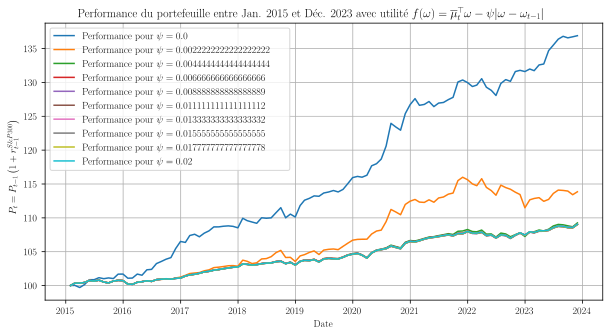

In [105]:
penalty_space = np.linspace(0, 0.02, 10)
P_0 = 100
plt.figure(figsize=(10, 5))

for psi in penalty_space:
    weights_df = iterative_optimization(initial_weights, psi=psi)
    weights_df.index = mu.index
    index_per_ticker = weights_df.mul(filtered_returns)
    performance = index_per_ticker.sum(axis=1)
    
    index_values = pd.Series(index=performance.index)
    
    # Définissez la valeur initiale de l'indice
    index_values.iloc[0] = P_0
    for i in range(1, len(index_values)):
        index_values.iloc[i] = index_values.iloc[i - 1] * (1 + performance.iloc[i])

    plt.plot(index_values, label=r"Performance pour $\psi={}$".format(psi))
plt.title('Performance du portefeuille entre Jan. 2015 et Déc. 2023 avec utilité $f(\omega) = \overline{\mu}_t^{\\top} \omega-\psi|\omega-\omega_{t-1}|$')
plt.xlabel('Date')
plt.ylabel('$P_t = P_{t-1} \left(1+r_{t-1}^{S\& P300}\\right)$')
plt.legend()
plt.grid(True)
plt.show()